In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# basic files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity
from statsmodels.tsa.stattools import acf,pacf,adfuller

# ARMA
from statsmodels.tsa.arima.model import ARIMA
# error
from sklearn.metrics import mean_squared_error

# Ljung-Box test for model goodness
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


In [3]:
df_tools = pd.read_csv("TOOLS_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [4]:
df_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE
0,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AL19QO4XLBQPU,5.0,True,"returned, decided against this product",2018-01-28
1,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1I7CVB7X3T81E,5.0,True,Awesome heater for the electrical requirements...,2017-11-30
2,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1AQXO4P5U674E,5.0,True,Keeps the mist of your wood trim and on you. B...,2017-09-12
3,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AIRV678P7C4NK,4.0,True,"So far I hooked it up and tested it , filled a...",2017-07-19
4,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A22I5QDNTNECDW,1.0,True,"i installed this 10 months ago, instructions w...",2017-05-25


In [5]:
df_tools['title'].nunique()

67549

In [6]:
# Converting to datetime dtype
df_tools['DATE']=pd.to_datetime(df_tools['DATE'])

In [7]:
# Sorting values by date
df_tools.sort_values(by='DATE',inplace=True)

In [8]:
df_tools=df_tools.set_index('DATE')
df_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,Bosch 1276DVS 12.5 Amp 4-Inch-by-24-Inch Varia...,Bosch,Tools & Home Improvement,45.902274,B0000223H9,A38GS2D6O5N767,5.0,False,"Great power, lightweight, exceptional balance ..."


In [9]:
plt.rcParams['axes.grid'] = True

In [10]:
df_tools = df_tools[['price']]

In [11]:
df_tools_monthly=df_tools.resample('M').sum()
df_tools_quaterly=df_tools.resample('Q').sum()
df_tools_yearly=df_tools.resample('Y').sum()
df_tools_weekly=df_tools.resample('W').sum()

# QUARTERLY 

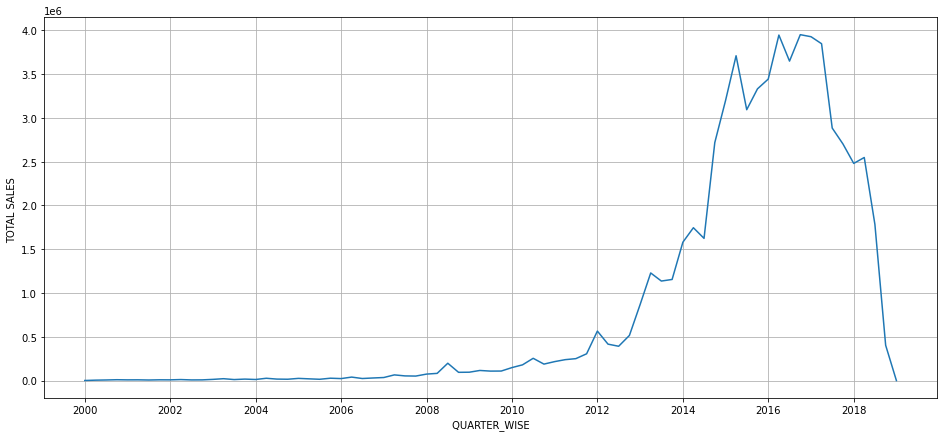

In [12]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_tools_quaterly);

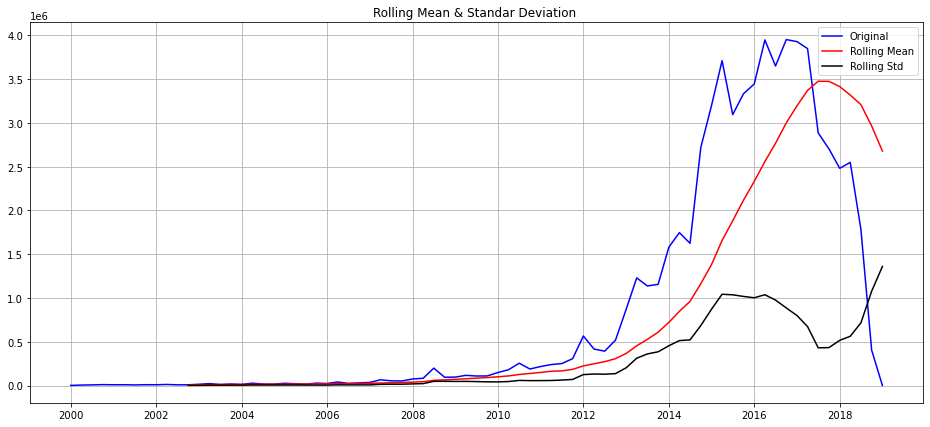

In [13]:
# DETERMINE ROLLING STATISTICS 
rollmean = df_tools_quaterly.rolling(12).mean()
rollstd = df_tools_quaterly.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

# plot rolling statistics 
orig = plt.plot(df_tools_quaterly,color = "blue",label = "Original")
mean = plt.plot(rollmean,color = "red",label = "Rolling Mean")
std = plt.plot(rollstd,color = "black",label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standar Deviation ")
plt.show(block = False)

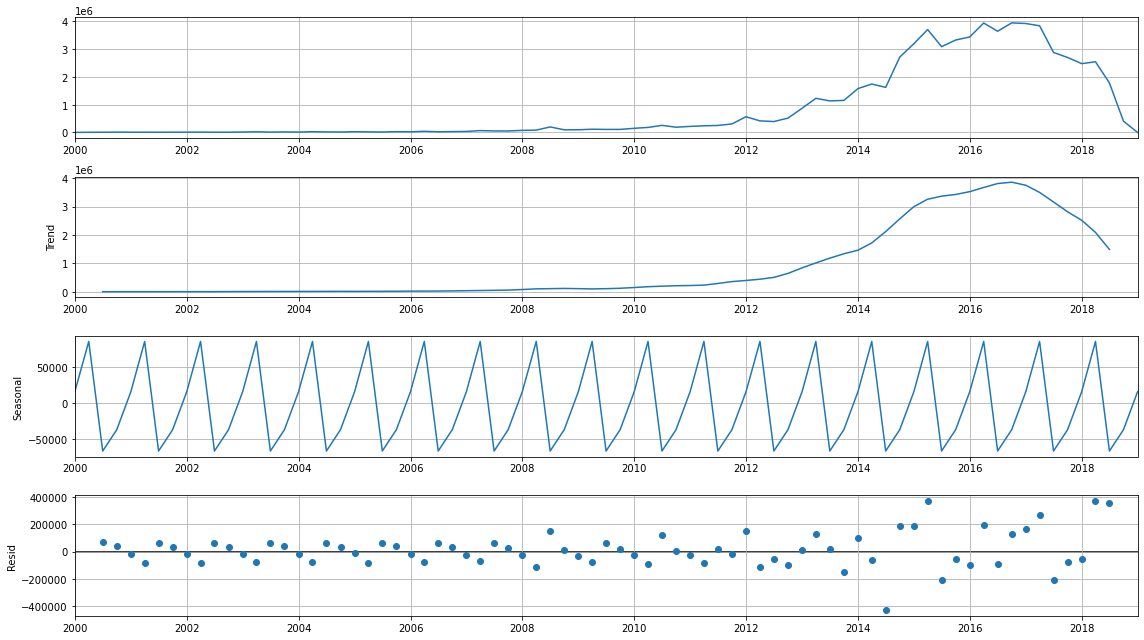

In [14]:
fig_qp=seasonal_decompose(df_tools_quaterly).plot();
fig_qp.set_size_inches((16,9))
fig_qp.tight_layout()
plt.show()

# CHECKING FOR STATIONARITY 

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(df_tools_quaterly)

ADF Test Statistic : -3.022699951928681
p-value : 0.03282820541844562
#Lags Used : 10
Number of Observations Used : 66
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## OUR DATA IS STATIONARY 

In [17]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(df_tools_quaterly,nlags = 20)
lag_pacf = pacf(df_tools_quaterly,nlags = 20)

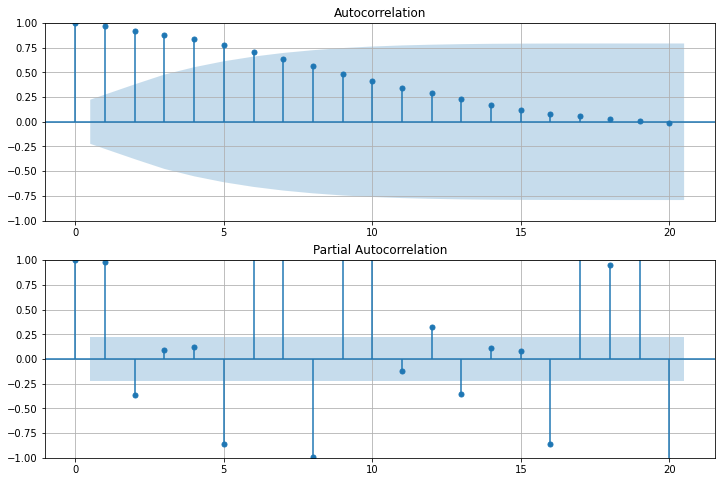

In [18]:
import statsmodels.api as sm 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_tools_quaterly,lags = 20 ,ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_tools_quaterly,lags = 20 ,ax = ax2)

# FINDING THE  BEST VALUES OF P , Q AND D 

In [19]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df_tools_quaterly,Trace = True,
                         suppress_warnings=True)

In [20]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1057.737
Date:                Wed, 08 Feb 2023   AIC                           2123.474
Time:                        15:52:38   BIC                           2132.797
Sample:                    12-31-1999   HQIC                          2127.200
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8708      0.097     -8.988      0.000      -1.061      -0.681
ma.L1          1.3214      0.141      9.372      0.000       1.045       1.598
ma.L2          0.5678      0.155      3.670      0.000       0.265       0.871
sigma2      9.154e+10   1.96e-12   4.67e+22      0.000    9.15e+10    9.15e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               336.78
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):            2329.31   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.32e+37. Standard errors may be unstable.
"""

In [21]:
from statsmodels.tsa.arima.model import ARIMA

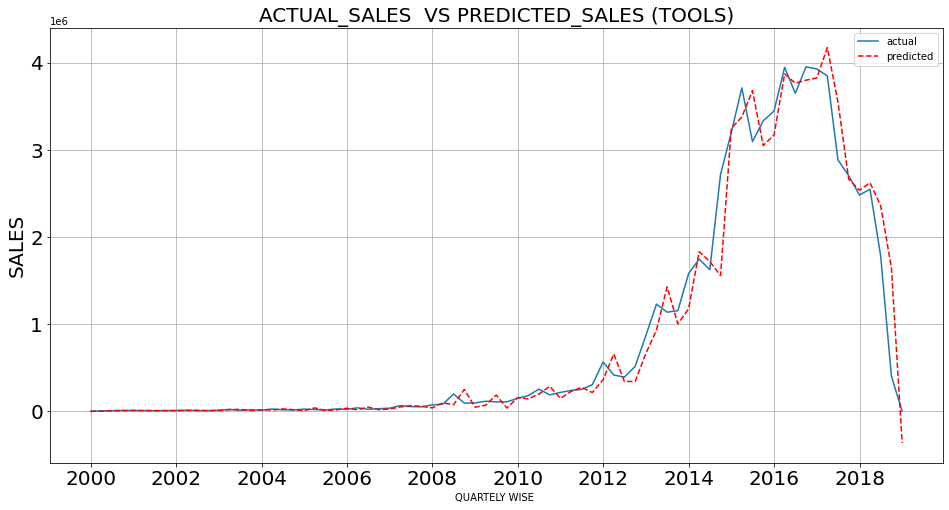

In [22]:
plt.figure(figsize=(16,8))
model = ARIMA(df_tools_quaterly,order=(1,1,2))
results_ARIMA = model.fit()
plt.plot(df_tools_quaterly)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES",fontsize=20)
plt.legend(["actual",'predicted']);
plt.title("ACTUAL_SALES  VS PREDICTED_SALES (TOOLS)",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [23]:
df_tools_quaterly

,price
DATE,
1999-12-31,1.781653e+03
2000-03-31,5.559216e+03
2000-06-30,7.651145e+03
2000-09-30,1.054074e+04
2000-12-31,8.942608e+03
...,...
2017-12-31,2.480278e+06
2018-03-31,2.547799e+06
2018-06-30,1.783831e+06


In [24]:
results_ARIMA.fittedvalues

DATE
1999-12-31    0.000000e+00
2000-03-31    2.342317e+03
2000-06-30    6.783330e+03
2000-09-30    8.377175e+03
2000-12-31    1.110459e+04
                  ...     
2017-12-31    2.536511e+06
2018-03-31    2.621526e+06
2018-06-30    2.359650e+06
2018-09-30    1.646386e+06
2018-12-31   -3.632734e+05
Freq: Q-DEC, Length: 77, dtype: float64

In [25]:
df = pd.DataFrame()

df['ACTUAL_SALES'] = df_tools_quaterly['price']
df['PREDICTED_SALES'] = results_ARIMA.fittedvalues.values

df['error'] = df['ACTUAL_SALES'] - df['PREDICTED_SALES']
df['ABSOLUTE_ERROR'] = abs(df['error'])

df['APE']= np.round((df['ABSOLUTE_ERROR']/df['ACTUAL_SALES'])*100,2)

df['square'] = df['error']**2
df

,ACTUAL_SALES,PREDICTED_SALES,error,ABSOLUTE_ERROR,APE,square
DATE,,,,,,
1999-12-31,1.781653e+03,0.000000e+00,1.781653e+03,1.781653e+03,100.00,3.174287e+06
2000-03-31,5.559216e+03,2.342317e+03,3.216899e+03,3.216899e+03,57.87,1.034844e+07
2000-06-30,7.651145e+03,6.783330e+03,8.678146e+02,8.678146e+02,11.34,7.531022e+05
2000-09-30,1.054074e+04,8.377175e+03,2.163566e+03,2.163566e+03,20.53,4.681016e+06
2000-12-31,8.942608e+03,1.110459e+04,-2.161981e+03,2.161981e+03,24.18,4.674160e+06
...,...,...,...,...,...,...
2017-12-31,2.480278e+06,2.536511e+06,-5.623330e+04,5.623330e+04,2.27,3.162184e+09
2018-03-31,2.547799e+06,2.621526e+06,-7.372681e+04,7.372681e+04,2.89,5.435642e+09
2018-06-30,1.783831e+06,2.359650e+06,-5.758194e+05,5.758194e+05,32.28,3.315679e+11


In [26]:
df = pd.DataFrame()

In [27]:
df['ACTUAL_SALES'] = df_tools_quaterly['price']

In [28]:
df.head()

,ACTUAL_SALES
DATE,
1999-12-31,1781.652762
2000-03-31,5559.215500
2000-06-30,7651.144644
2000-09-30,10540.741025
2000-12-31,8942.608263


In [29]:
df['PREDICTED_SALES'] = results_ARIMA.fittedvalues.values

In [30]:
df.head()

,ACTUAL_SALES,PREDICTED_SALES
DATE,,
1999-12-31,1781.652762,0.000000
2000-03-31,5559.215500,2342.316597
2000-06-30,7651.144644,6783.330039
2000-09-30,10540.741025,8377.175343
2000-12-31,8942.608263,11104.588774


In [31]:
df['error'] = df['ACTUAL_SALES'] - df['PREDICTED_SALES']
df

,ACTUAL_SALES,PREDICTED_SALES,error
DATE,,,
1999-12-31,1.781653e+03,0.000000e+00,1.781653e+03
2000-03-31,5.559216e+03,2.342317e+03,3.216899e+03
2000-06-30,7.651145e+03,6.783330e+03,8.678146e+02
2000-09-30,1.054074e+04,8.377175e+03,2.163566e+03
2000-12-31,8.942608e+03,1.110459e+04,-2.161981e+03
...,...,...,...
2017-12-31,2.480278e+06,2.536511e+06,-5.623330e+04
2018-03-31,2.547799e+06,2.621526e+06,-7.372681e+04
2018-06-30,1.783831e+06,2.359650e+06,-5.758194e+05


In [32]:
# 2) ABSOLUTE ERROR 
df['ABSOLUTE_ERROR'] = abs(df['error'])
df

,ACTUAL_SALES,PREDICTED_SALES,error,ABSOLUTE_ERROR
DATE,,,,
1999-12-31,1.781653e+03,0.000000e+00,1.781653e+03,1.781653e+03
2000-03-31,5.559216e+03,2.342317e+03,3.216899e+03,3.216899e+03
2000-06-30,7.651145e+03,6.783330e+03,8.678146e+02,8.678146e+02
2000-09-30,1.054074e+04,8.377175e+03,2.163566e+03,2.163566e+03
2000-12-31,8.942608e+03,1.110459e+04,-2.161981e+03,2.161981e+03
...,...,...,...,...
2017-12-31,2.480278e+06,2.536511e+06,-5.623330e+04,5.623330e+04
2018-03-31,2.547799e+06,2.621526e+06,-7.372681e+04,7.372681e+04
2018-06-30,1.783831e+06,2.359650e+06,-5.758194e+05,5.758194e+05


In [33]:
# 4) mean absolute deviation  ( average(/error/))
np.round(np.mean(df['ABSOLUTE_ERROR']),4)

128478.1614

In [34]:

xabc = np.round(np.mean(df['ABSOLUTE_ERROR']),4)
xabc

128478.1614

In [35]:
# Calcualate the MSE
mean_squared_error(df['ACTUAL_SALES'] , df['PREDICTED_SALES']) #on test data


67700924910.21065

In [36]:
np.sqrt(67700924910.21065)

260194.01397843618

In [37]:
# 3) absolute percentage error (/error/)/(actual)*100
ape = np.round((df['ABSOLUTE_ERROR']/df['ACTUAL_SALES'])*100,2)
ape

DATE
1999-12-31      100.00
2000-03-31       57.87
2000-06-30       11.34
2000-09-30       20.53
2000-12-31       24.18
                ...   
2017-12-31        2.27
2018-03-31        2.89
2018-06-30       32.28
2018-09-30      307.71
2018-12-31    65066.21
Freq: Q-DEC, Length: 77, dtype: float64

In [38]:
np.round(np.mean(ape),4)

880.3458

In [39]:
df.head()

,ACTUAL_SALES,PREDICTED_SALES,error,ABSOLUTE_ERROR
DATE,,,,
1999-12-31,1781.652762,0.000000,1781.652762,1781.652762
2000-03-31,5559.215500,2342.316597,3216.898903,3216.898903
2000-06-30,7651.144644,6783.330039,867.814605,867.814605
2000-09-30,10540.741025,8377.175343,2163.565682,2163.565682
2000-12-31,8942.608263,11104.588774,-2161.980512,2161.980512


In [40]:
df['square'] = df['error']**2

In [41]:
df

,ACTUAL_SALES,PREDICTED_SALES,error,ABSOLUTE_ERROR,square
DATE,,,,,
1999-12-31,1.781653e+03,0.000000e+00,1.781653e+03,1.781653e+03,3.174287e+06
2000-03-31,5.559216e+03,2.342317e+03,3.216899e+03,3.216899e+03,1.034844e+07
2000-06-30,7.651145e+03,6.783330e+03,8.678146e+02,8.678146e+02,7.531022e+05
2000-09-30,1.054074e+04,8.377175e+03,2.163566e+03,2.163566e+03,4.681016e+06
2000-12-31,8.942608e+03,1.110459e+04,-2.161981e+03,2.161981e+03,4.674160e+06
...,...,...,...,...,...
2017-12-31,2.480278e+06,2.536511e+06,-5.623330e+04,5.623330e+04,3.162184e+09
2018-03-31,2.547799e+06,2.621526e+06,-7.372681e+04,7.372681e+04,5.435642e+09
2018-06-30,1.783831e+06,2.359650e+06,-5.758194e+05,5.758194e+05,3.315679e+11


In [42]:
np.sqrt(df['square'].sum()/77)

260194.01397843618

In [43]:
("*")*100

'****************************************************************************************************'

In [44]:
len(results_ARIMA.fittedvalues)

77

In [45]:
p=1;d=1;q=2

m1 = ARIMA(df_tools_quaterly,order=(p,d,q)).fit()

In [46]:
# forecast on the test data
start = 75
end = 95
f1 = m1.predict(start,end)
f1

2018-09-30    1.646386e+06
2018-12-31   -3.632734e+05
2019-03-31    1.269506e+05
2019-06-30    2.234680e+05
2019-09-30    1.394179e+05
2019-12-31    2.126111e+05
2020-03-31    1.488723e+05
2020-06-30    2.043779e+05
2020-09-30    1.560421e+05
2020-12-31    1.981343e+05
2021-03-31    1.614792e+05
2021-06-30    1.933995e+05
2021-09-30    1.656024e+05
2021-12-31    1.898090e+05
2022-03-31    1.687291e+05
2022-06-30    1.870861e+05
2022-09-30    1.711003e+05
2022-12-31    1.850212e+05
2023-03-31    1.728985e+05
2023-06-30    1.834553e+05
2023-09-30    1.742621e+05
Freq: Q-DEC, Name: predicted_mean, dtype: float64

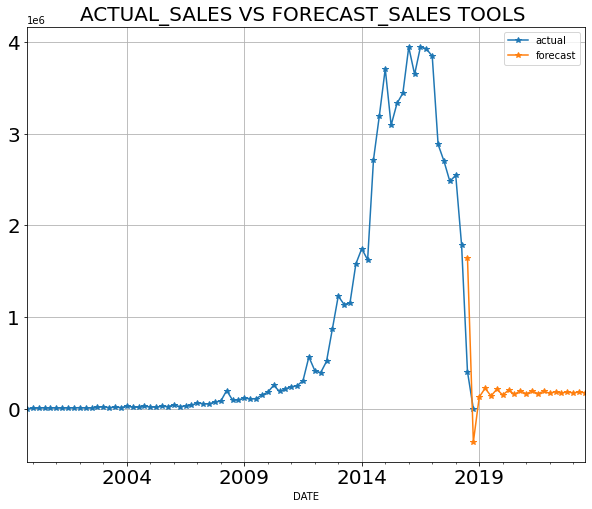

In [47]:
df_tools_quaterly.plot(figsize=(10,8),legend=True,marker = "*")
f1.plot(legend=True,marker = "*");
plt.legend(["actual",'forecast']);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ACTUAL_SALES VS FORECAST_SALES TOOLS ",fontsize=20);

### demand analysis 

In [48]:
demand_tools = pd.read_csv("TOOLS_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [49]:
# Converting to datetime dtype
demand_tools['DATE']=pd.to_datetime(demand_tools['DATE'])

# Sorting values by date
demand_tools.sort_values(by='DATE',inplace=True)
demand_tools=demand_tools.set_index('DATE')
demand_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-08,"Stanley 15-087 20-Inch, 8-Point Contractor Gra...",Stanley,Tools & Home Improvement,23.610000,B00002X20X,A1B3GNO9C8YX0N,5.0,True,I have a few of these now and find them small ...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,DELTA 50-345 Universal Mobile Base (Wood Not I...,Delta,Tools & Home Improvement,54.990000,B0000223CL,A2013JDMPUV6D9,5.0,False,I have purchased three of these for my small h...
1999-11-20,Bosch 1276DVS 12.5 Amp 4-Inch-by-24-Inch Varia...,Bosch,Tools & Home Improvement,45.902274,B0000223H9,A38GS2D6O5N767,5.0,False,"Great power, lightweight, exceptional balance ..."


In [50]:
demand_tools_monthly=demand_tools['product_id'].resample('M').count()
demand_tools_quaterly=demand_tools['product_id'].resample('Q').count()
demand_tools_yearly=demand_tools['product_id'].resample('Y').count()
demand_tools_weekly=demand_tools['product_id'].resample('W').count()

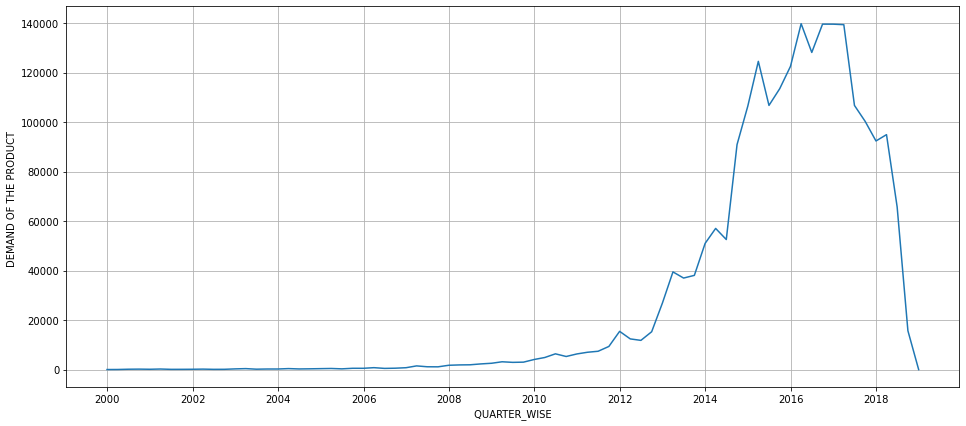

In [51]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("DEMAND OF THE PRODUCT ")
ax1.plot(demand_tools_quaterly);

In [52]:
# STATIONARITY CHECK 

In [53]:
adfuller_test(demand_tools_quaterly)

ADF Test Statistic : -3.2767066941692344
p-value : 0.015952339746583027
#Lags Used : 10
Number of Observations Used : 66
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [54]:
# FINDING THE BEST VALUE OF P , Q AND D 

In [55]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(demand_tools_quaterly,Trace = True,
                         suppress_warnings=True)

In [56]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -802.068
Date:                Wed, 08 Feb 2023   AIC                           1612.136
Time:                        15:53:17   BIC                           1621.459
Sample:                    12-31-1999   HQIC                          1615.862
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8785      0.092     -9.510      0.000      -1.060      -0.697
ma.L1          1.3535      0.147      9.236      0.000       1.066       1.641
ma.L2          0.5774      0.137      4.213      0.000       0.309       0.846
sigma2      1.089e+08   1.27e-09   8.58e+16      0.000    1.09e+08    1.09e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               405.84
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):           16029.33   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+32. Standard errors may be unstable.
"""

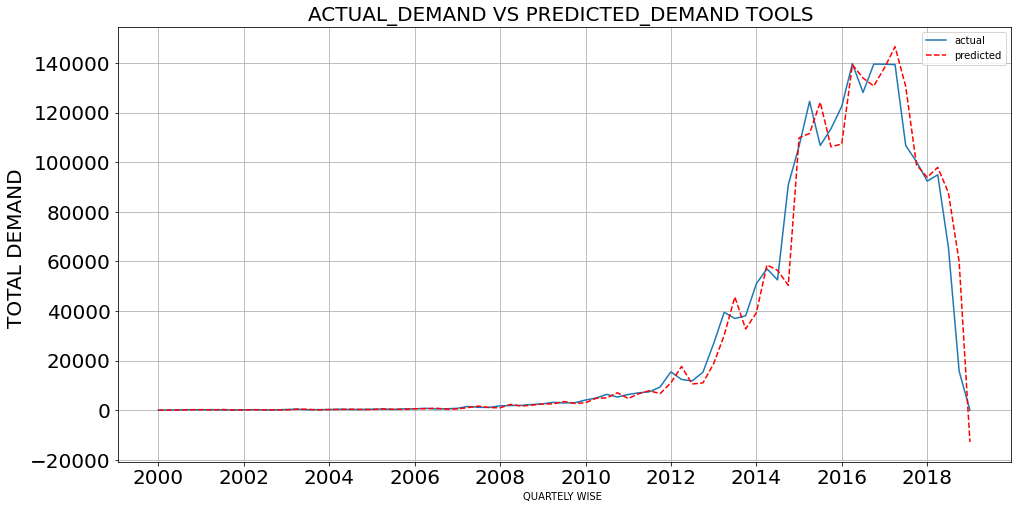

In [57]:
plt.figure(figsize=(16,8))
model= ARIMA(demand_tools_quaterly,order=(1,1,2))
results_ARIMA = model.fit()
plt.plot(demand_tools_quaterly)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUARTELY WISE ")
plt.ylabel("TOTAL DEMAND ",fontsize=20)
plt.legend(["actual",'predicted']);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ACTUAL_DEMAND VS PREDICTED_DEMAND TOOLS ",fontsize=20)
plt.show()

In [58]:
p=1;d=1;q=2

m_D_tool = ARIMA(demand_tools_quaterly,order=(p,d,q)).fit()

In [59]:
# forecast on the test data
start = 75
end = 95
f_demand = m_D_tool.predict(start,end)
f_demand

2018-09-30    59859.970119
2018-12-31   -12823.282662
2019-03-31     5698.645927
2019-06-30     8126.816647
2019-09-30     5993.648148
2019-12-31     7867.654703
2020-03-31     6221.324106
2020-06-30     7667.639449
2020-09-30     6397.039197
2020-12-31     7513.272257
2021-03-31     6532.652079
2021-06-30     7394.135193
2021-09-30     6637.314997
2021-12-31     7302.187936
2022-03-31     6718.091440
2022-06-30     7231.225148
2022-09-30     6780.432849
2022-12-31     7176.457694
2023-03-31     6828.546520
2023-06-30     7134.189427
2023-09-30     6865.679550
Freq: Q-DEC, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ACTUAL_DEMAND VS FORECAST_DEMAND TOOLS ')

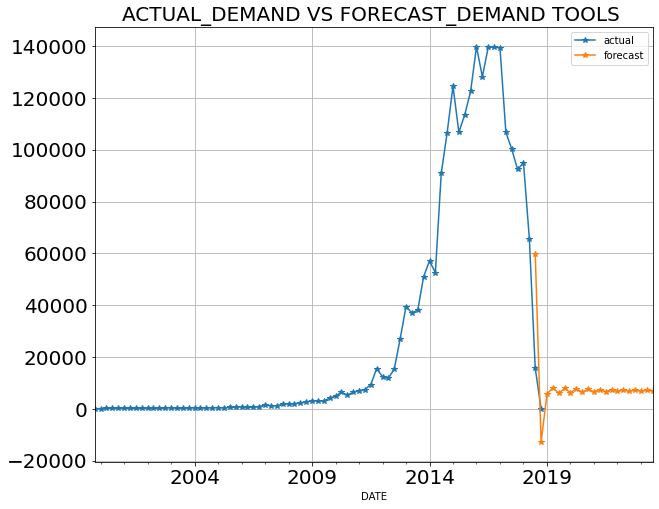

In [60]:
demand_tools_quaterly.plot(figsize=(10,8),legend=True,marker = "*")
f_demand.plot(legend=True,marker = "*");
plt.legend(["actual",'forecast']);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("ACTUAL_DEMAND VS FORECAST_DEMAND TOOLS ",fontsize=20)

## patio 

In [61]:
df_patio = pd.read_csv("PATIO_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [62]:
df_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE
0,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,AUVPE2KEXBJVT,5.0,True,I don't spend a lot on my flags because they r...,2011-12-11
1,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A2F6GES1MBOFXS,5.0,True,"Super fast processing and shipping, if you are...",2011-07-30
2,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1SDVD3SZI1BAK,5.0,True,Great product. I would recommend this product...,2016-05-04
3,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1ZQJ3KCSLUPR3,5.0,True,GREAT PRICE I LOVE MY STATE AND COUNTRY,2015-11-02
4,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,ANU8FBZM618M3,5.0,True,Great display flag for the den.,2015-09-01


In [63]:
# Converting to datetime dtype
df_patio['DATE']=pd.to_datetime(df_patio['DATE'])

In [64]:
# Sorting values by date
df_patio.sort_values(by='DATE',inplace=True)

In [65]:
df_patio=df_patio.set_index('DATE')
df_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
2000-03-15,Earthway 2750 Hand-Operated Bag Spreader/Seede...,Earthway,Amazon Home,3.330000,B0009GZA6O,A1B3GNO9C8YX0N,5.0,False,I use one of these to broadcast the various gr...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...


In [66]:
df_patio = df_patio[['price']]

In [67]:
df_patio_monthly=df_patio.resample('M').sum()
df_patio_quaterly=df_patio.resample('Q').sum()
df_patio_yearly=df_patio.resample('Y').sum()
df_patio_weekly=df_patio.resample('W').sum()

# QUARTERLY 

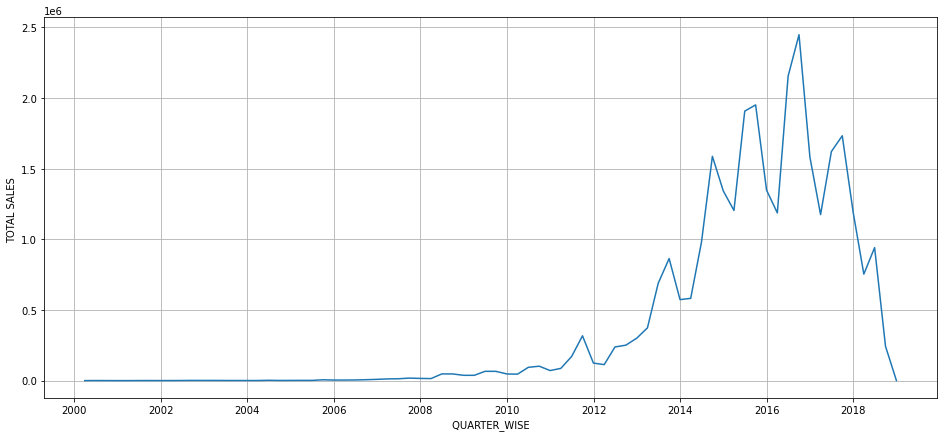

In [68]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_patio_quaterly);

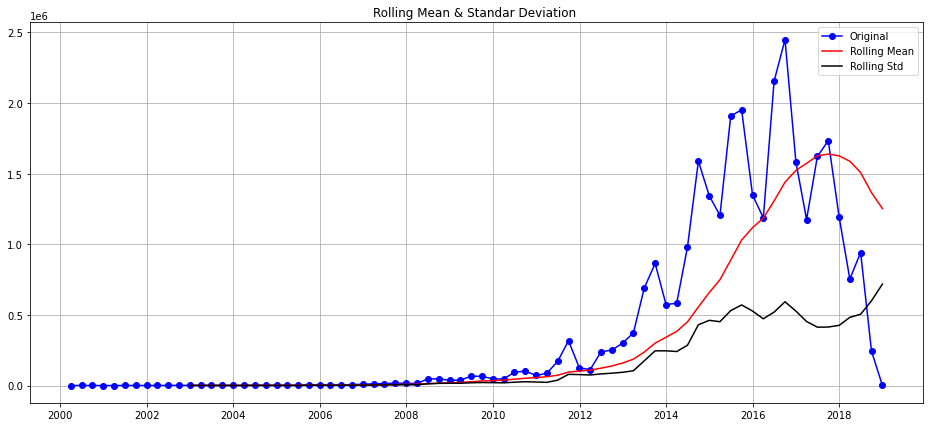

In [69]:
# DETERMINE ROLLING STATISTICS 
rollmean = df_patio_quaterly.rolling(12).mean()
rollstd = df_patio_quaterly.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

# plot rolling statistics 
orig = plt.plot(df_patio_quaterly,marker='o',color = "blue",label = "Original")
mean = plt.plot(rollmean,color = "red",label = "Rolling Mean")
std = plt.plot(rollstd,color = "black",label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standar Deviation ")
plt.show(block = False)

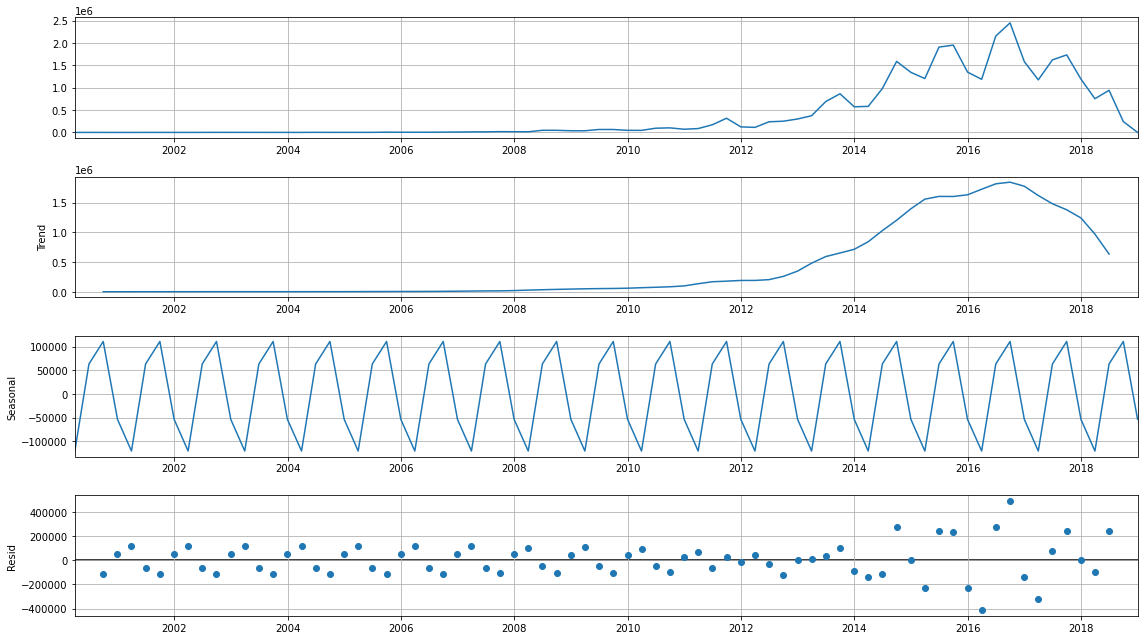

In [70]:
fig_qp=seasonal_decompose(df_patio_quaterly).plot();
fig_qp.set_size_inches((16,9))
fig_qp.tight_layout()
plt.show()

In [71]:
adfuller_test(df_patio_quaterly)

ADF Test Statistic : -2.758130983095417
p-value : 0.06450781381297811
#Lags Used : 11
Number of Observations Used : 64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [72]:
 df_patio_quaterly_diff = df_patio_quaterly['price'] - df_patio_quaterly['price'].shift(1)

In [73]:
## Again test dickey fuller test
adfuller_test(df_patio_quaterly_diff.dropna())

ADF Test Statistic : -3.470162325631665
p-value : 0.008787281381770658
#Lags Used : 12
Number of Observations Used : 62
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [74]:
 df_patio_quaterly_diff = df_patio_quaterly_diff.dropna()

In [75]:
df_patio_quaterly_diff.head()

DATE
2000-06-30    457.870334
2000-09-30   -280.560000
2000-12-31   -164.780334
2001-03-31    -15.860000
2001-06-30    331.760334
Freq: Q-DEC, Name: price, dtype: float64

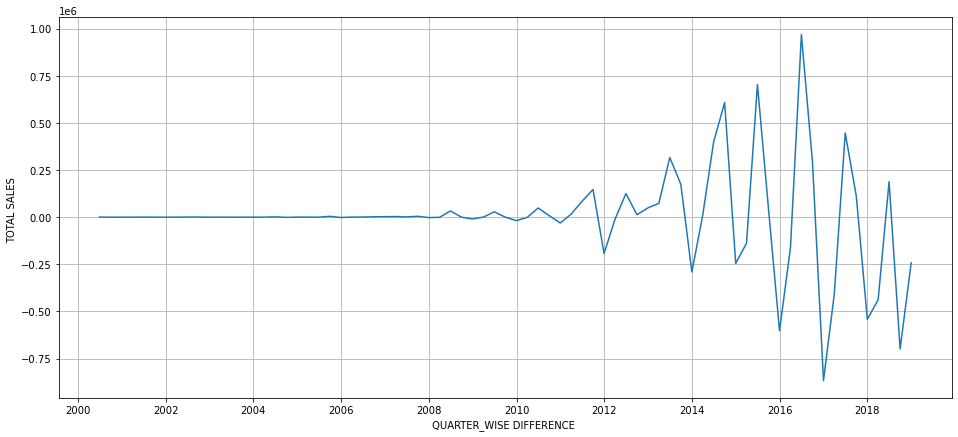

In [76]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE DIFFERENCE  ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_patio_quaterly_diff);

# FINDING THE BEST VALUE FOR P , Q , D 

In [77]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df_patio_quaterly_diff,Trace = True,
                         suppress_warnings=True)

In [78]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -1006.737
Date:                Wed, 08 Feb 2023   AIC                           2027.474
Time:                        15:53:33   BIC                           2043.697
Sample:                    06-30-2000   HQIC                          2033.952
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0224      0.117      8.701      0.000       0.792       1.253
ar.L2         -0.7251      0.146     -4.952      0.000      -1.012      -0.438
ar.L3          0.6208      0.114      5.438      0.000       0.397       0.845
ma.L1         -1.0638      0.145     -7.354      0.000      -1.347      -0.780
ma.L2          0.0556      0.231      0.241      0.809      -0.396       0.508
ma.L3          0.4535      0.167      2.723      0.006       0.127       0.780
sigma2      2.893e+10   3.36e-12    8.6e+21      0.000    2.89e+10    2.89e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               166.50
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):           44844.75   Skew:                            -1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.92e+38. Standard errors may be unstable.
"""

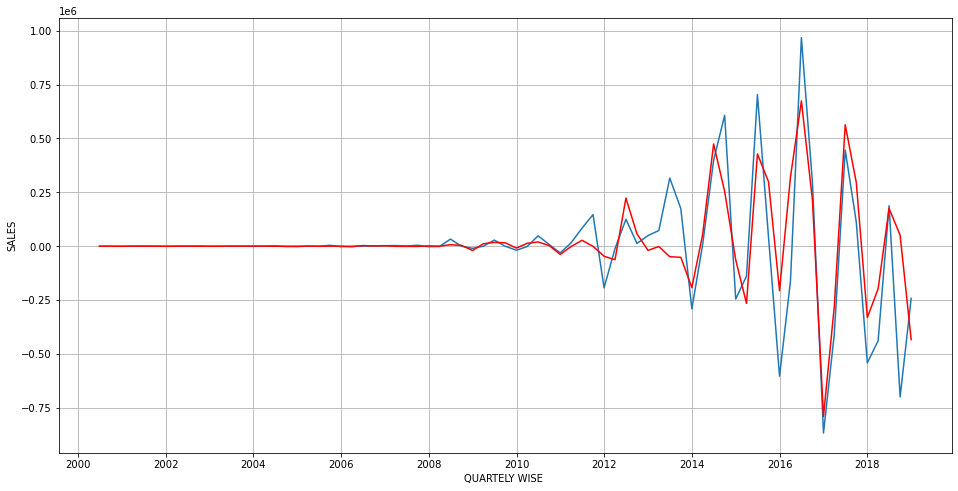

In [79]:
plt.figure(figsize=(16,8))
model = ARIMA(df_patio_quaterly_diff,order=(3,0,3))
results_ARIMA = model.fit()
plt.plot(df_patio_quaterly_diff)
plt.plot(results_ARIMA.fittedvalues,color = "red");
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES")
plt.show()

In [80]:
p=3;d=1;q=3

m2 = ARIMA(df_patio_quaterly,order=(p,d,q)).fit()

In [81]:
# forecast on the test data
start = 0
end = 75
checking = m2.predict(start,end)
checking

DATE
2000-03-31    0.000000e+00
2000-06-30    4.018690e+00
2000-09-30    5.960625e+02
2000-12-31   -2.496273e+02
2001-03-31    2.481514e+02
                  ...     
2017-12-31    1.396646e+06
2018-03-31    9.897978e+05
2018-06-30    9.288583e+05
2018-09-30    9.919728e+05
2018-12-31   -1.981255e+05
Freq: Q-DEC, Name: predicted_mean, Length: 76, dtype: float64

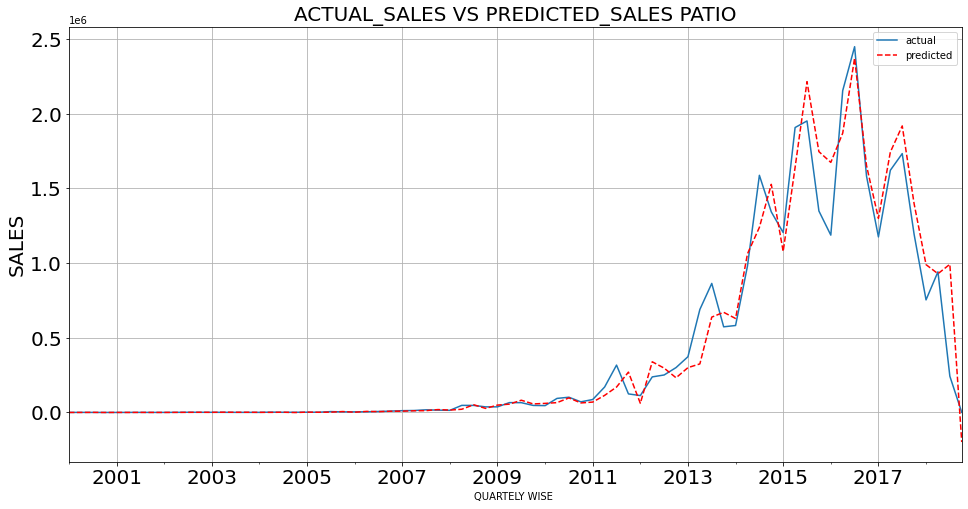

In [82]:
df_patio_quaterly.plot(figsize=(16,8),legend=True)
checking.plot(legend=True,linestyle = "dashed",color = "red");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES",fontsize=20)
plt.title("ACTUAL_SALES VS PREDICTED_SALES PATIO",fontsize=20)
plt.legend(["actual",'predicted']);

In [83]:
checking

DATE
2000-03-31    0.000000e+00
2000-06-30    4.018690e+00
2000-09-30    5.960625e+02
2000-12-31   -2.496273e+02
2001-03-31    2.481514e+02
                  ...     
2017-12-31    1.396646e+06
2018-03-31    9.897978e+05
2018-06-30    9.288583e+05
2018-09-30    9.919728e+05
2018-12-31   -1.981255e+05
Freq: Q-DEC, Name: predicted_mean, Length: 76, dtype: float64

In [84]:
df_patio_quaterly

,price
DATE,
2000-03-31,3.330000e+00
2000-06-30,4.612003e+02
2000-09-30,1.806403e+02
2000-12-31,1.586000e+01
2001-03-31,0.000000e+00
...,...
2017-12-31,1.191638e+06
2018-03-31,7.536910e+05
2018-06-30,9.416152e+05


In [85]:
# forecast on the test data
start = 74
end = 80
predicting_future = m2.predict(start,end)
predicting_future

2018-09-30    9.919728e+05
2018-12-31   -1.981255e+05
2019-03-31    1.350853e+05
2019-06-30   -3.210593e+05
2019-09-30   -9.529456e+05
2019-12-31   -1.181947e+06
2020-03-31   -1.243555e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64

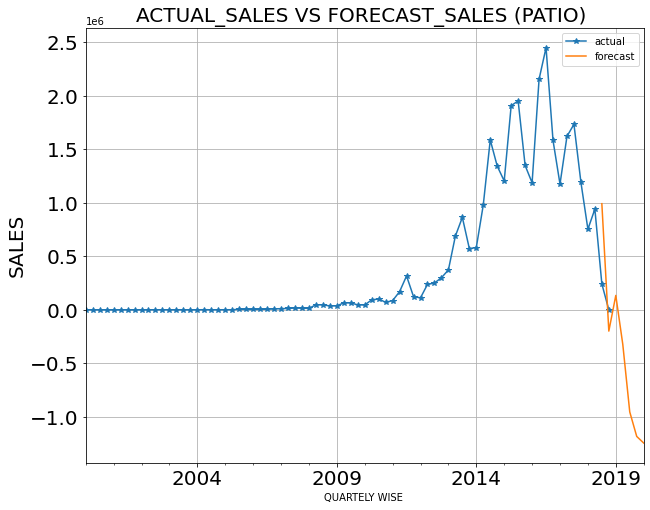

In [86]:
df_patio_quaterly.plot(figsize=(10,8),legend=True,marker = '*')
predicting_future.plot(legend=True);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("QUARTELY WISE ")
plt.ylabel("SALES",fontsize=20)
plt.title("ACTUAL_SALES VS FORECAST_SALES (PATIO) ",fontsize=20)
plt.legend(["actual",'forecast']);

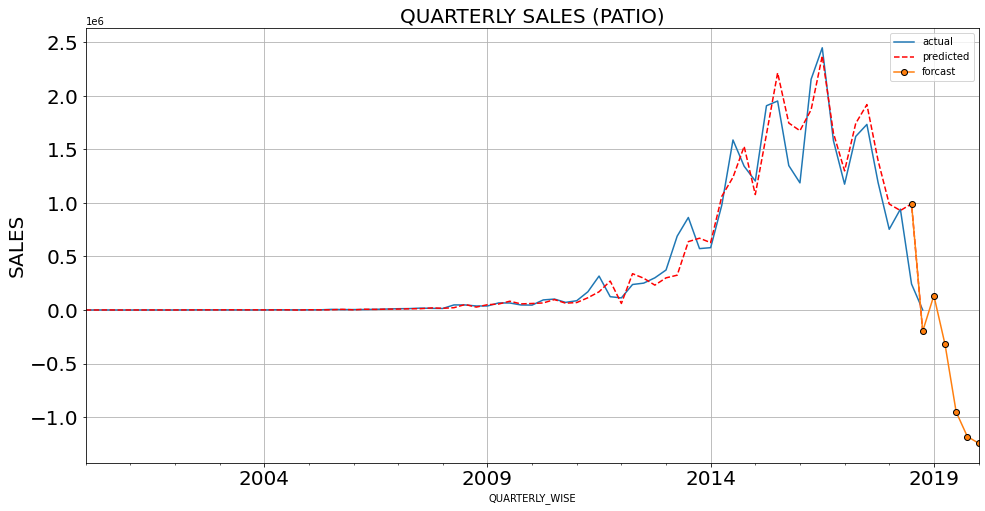

In [87]:
df_patio_quaterly.plot(figsize=(16,8),legend=True)
checking.plot(legend=True,linestyle = "dashed",color = "red");
predicting_future.plot(legend=True,marker = "o",mec = "black");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("QUARTERLY_WISE")
plt.ylabel("SALES",fontsize=20)
plt.title("QUARTERLY SALES (PATIO)",fontsize=20)
plt.legend(["actual",'predicted',"forcast"]);

In [88]:
df_patio_quaterly.shape

(76, 1)

In [89]:
## 

# DEMAND ANALYSIS 

In [90]:
demand_patio = pd.read_csv("PATIO_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING")

In [91]:
# Converting to datetime dtype
demand_patio['DATE']=pd.to_datetime(demand_patio['DATE'])

# Sorting values by date
demand_patio.sort_values(by='DATE',inplace=True)
demand_patio=demand_patio.set_index('DATE')
demand_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText
DATE,,,,,,,,,
2000-03-15,Earthway 2750 Hand-Operated Bag Spreader/Seede...,Earthway,Amazon Home,3.330000,B0009GZA6O,A1B3GNO9C8YX0N,5.0,False,I use one of these to broadcast the various gr...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-04-05,Garden Weasel Gold Garden Claw Cultivator 9130...,Garden Weasel,Amazon Home,89.990000,B00004RA1S,AVBLGXSWRN666,4.0,False,This is a handy tool for cultivating small are...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...
2000-05-02,Fiskars 92346935K 62-Inch Pruning Stik,Fiskars,Amazon Home,52.730167,B00004SD6U,A1XR58IRKP3HEZ,5.0,False,This pruning stick is the best thing to come a...


In [92]:
demand_patio_quaterly=demand_patio['product_id'].resample('Q').count()

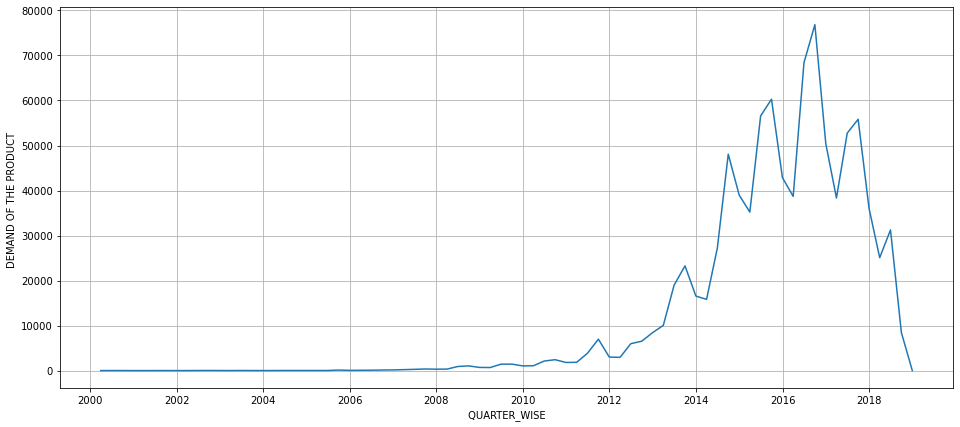

In [93]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("DEMAND OF THE PRODUCT ")
ax1.plot(demand_patio_quaterly);

In [94]:
# STATIONARITY CHECK 

In [95]:
adfuller_test(demand_patio_quaterly)

ADF Test Statistic : -1.7406146188100173
p-value : 0.4103173554973095
#Lags Used : 12
Number of Observations Used : 63
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [96]:
# FINDING THE BEST VALUE OF P D AND Q 

In [97]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(demand_patio_quaterly,Trace = True,
                         suppress_warnings=True)

In [98]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(4, 1, 5)   Log Likelihood                -734.996
Date:                Wed, 08 Feb 2023   AIC                           1489.992
Time:                        15:53:52   BIC                           1513.167
Sample:                    03-31-2000   HQIC                          1499.246
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1744      0.337      0.517      0.605      -0.486       0.835
ar.L2         -0.3612      0.282     -1.279      0.201      -0.915       0.192
ar.L3          0.4913      0.263      1.867      0.062      -0.025       1.007
ar.L4          0.4260      0.272      1.563      0.118      -0.108       0.960
ma.L1         -0.0344      0.404     -0.085      0.932      -0.826       0.757
ma.L2         -0.2953      0.202     -1.463      0.143      -0.691       0.100
ma.L3         -0.1822      0.248     -0.735      0.462      -0.668       0.304
ma.L4          0.0003      0.184      0.001      0.999      -0.361       0.361
ma.L5          0.8091      0.140      5.763      0.000       0.534       1.084
sigma2      2.497e+07   4.49e-08   5.56e+14      0.000     2.5e+07     2.5e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                82.83
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):           50013.93   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.71e+30. Standard errors may be unstable.
"""

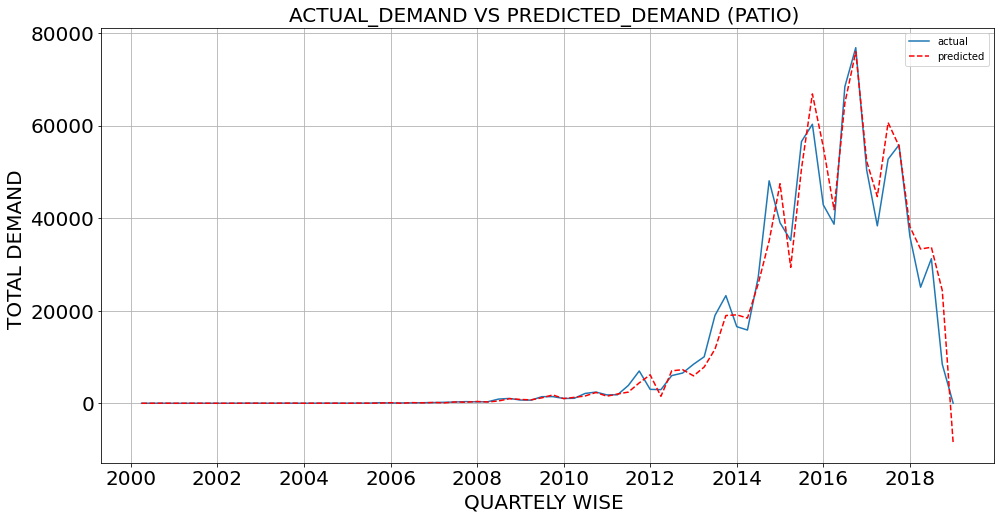

In [99]:
plt.figure(figsize=(16,8))
model= ARIMA(demand_patio_quaterly,order=(4,1,5))
results_ARIMA = model.fit()
plt.plot(demand_patio_quaterly)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUARTELY WISE ",fontsize=20)
plt.ylabel("TOTAL DEMAND ",fontsize=20)
plt.legend(["actual",'predicted']);
plt.title("ACTUAL_DEMAND VS PREDICTED_DEMAND (PATIO) ",fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [100]:
p=4;d=1;q=5

p_D_tool = ARIMA(demand_patio_quaterly,order=(p,d,q)).fit()

In [101]:
# forecast on the test data
start = 75
end = 85
patio_demand = p_D_tool.predict(start,end)
patio_demand

2018-12-31    -8590.917521
2019-03-31     8284.012001
2019-06-30    -2077.851963
2019-09-30   -24307.770483
2019-12-31   -36842.577084
2020-03-31   -25619.907984
2020-06-30   -34470.154253
2020-09-30   -55695.617624
2020-12-31   -56026.052197
2021-03-31   -47983.960624
2021-06-30   -60660.282527
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [102]:
# sb.set_theme(style='darkgrid') 

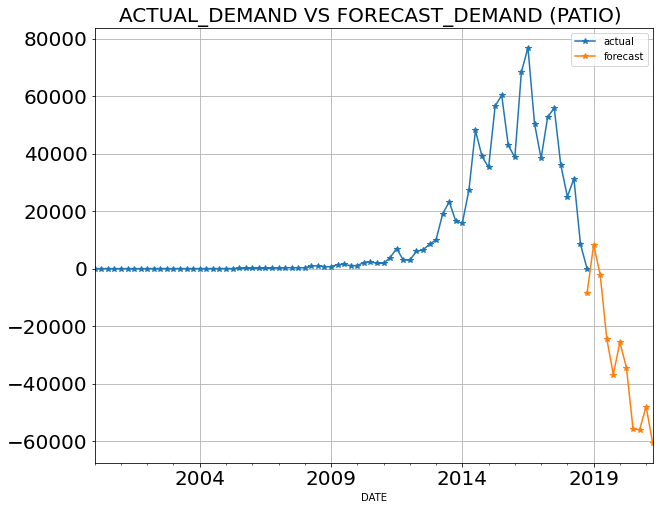

In [103]:
demand_patio_quaterly.plot(figsize=(10,8),legend=True,marker = "*")
patio_demand.plot(legend=True,marker = "*");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["actual",'forecast']);

plt.title("ACTUAL_DEMAND VS FORECAST_DEMAND (PATIO) ",fontsize=20);

In [104]:
demand_patio_quaterly

DATE
2000-03-31        1
2000-06-30       16
2000-09-30       12
2000-12-31        2
2001-03-31        0
              ...  
2017-12-31    36040
2018-03-31    25080
2018-06-30    31243
2018-09-30     8440
2018-12-31        8
Freq: Q-DEC, Name: product_id, Length: 76, dtype: int64

In [105]:
df2 = pd.DataFrame()

df2['ACTUAL_PRODUCTS'] = demand_patio_quaterly.values
df2['PREDICTED_PRODUCTS'] = results_ARIMA.fittedvalues.values

df2['error'] = df2['ACTUAL_PRODUCTS'] - df2['PREDICTED_PRODUCTS']
df2['ABSOLUTE_ERROR'] = abs(df2['error'])

df2['APE']= np.round((df2['ABSOLUTE_ERROR']/df2['ACTUAL_PRODUCTS'])*100,2)

df2['square'] = df2['error']**2
print(df2)
print(np.sqrt(df2['square'].sum()/77))

    ACTUAL_PRODUCTS  PREDICTED_PRODUCTS         error  ABSOLUTE_ERROR  \
0                 1            0.000000      1.000000        1.000000   
1                16            1.083650     14.916350       14.916350   
2                12           17.424655     -5.424655        5.424655   
3                 2            0.140407      1.859593        1.859593   
4                 0            7.757905     -7.757905        7.757905   
..              ...                 ...           ...             ...   
71            36040        38137.540409  -2097.540409     2097.540409   
72            25080        33331.559440  -8251.559440     8251.559440   
73            31243        33719.060160  -2476.060160     2476.060160   
74             8440        24386.639355 -15946.639355    15946.639355   
75                8        -8590.917521   8598.917521     8598.917521   

          APE        square  
0      100.00  1.000000e+00  
1       93.23  2.224975e+02  
2       45.21  2.942689e+01  
3  

In [106]:
np.sqrt(df2['square'].sum()/77)

3891.5791198155507

In [107]:
print('Mean Absolute Percent Error:', round(np.mean(abs(df2['error']/77)),4))

Mean Absolute Percent Error: 25.6658


In [108]:
print('Root Mean Squared Error:', np.sqrt(np.mean(df2['error']**2)))

Root Mean Squared Error: 3917.0979448495664


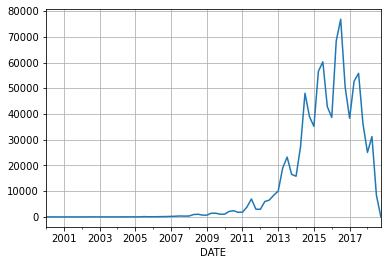

In [109]:
demand_patio_quaterly.plot();

In [110]:
demand_patio_quaterly.sort_values(ascending = False)

DATE
2016-09-30    76840
2016-06-30    68416
2015-09-30    60290
2015-06-30    56557
2017-09-30    55823
              ...  
2002-03-31        6
2001-12-31        4
2000-12-31        2
2000-03-31        1
2001-03-31        0
Name: product_id, Length: 76, dtype: int64

# DATE
# 2016-09-30    76840

In [111]:
# pos = demand_patio_quaterly.index.between("1999-11-08","2016-09-30")

In [112]:
pos = demand_patio_quaterly.copy()

In [113]:
pos.reset_index()

,DATE,product_id
0,2000-03-31,1
1,2000-06-30,16
2,2000-09-30,12
3,2000-12-31,2
4,2001-03-31,0
...,...,...
71,2017-12-31,36040
72,2018-03-31,25080
73,2018-06-30,31243
74,2018-09-30,8440


In [114]:
pos.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 76 entries, 2000-03-31 to 2018-12-31
Freq: Q-DEC
Series name: product_id
Non-Null Count  Dtype
--------------  -----
76 non-null     int64
dtypes: int64(1)
memory usage: 3.2 KB


In [115]:
pos = pos.to_frame()

In [116]:
# pos = demand_patio_quaterly.index.between("1999-11-08","2016-09-30")

In [117]:
pos.sort_index()

,product_id
DATE,
2000-03-31,1
2000-06-30,16
2000-09-30,12
2000-12-31,2
2001-03-31,0
...,...
2017-12-31,36040
2018-03-31,25080
2018-06-30,31243


In [118]:
before = pos['1999-11-08':'2016-09-30']

<AxesSubplot:xlabel='DATE'>

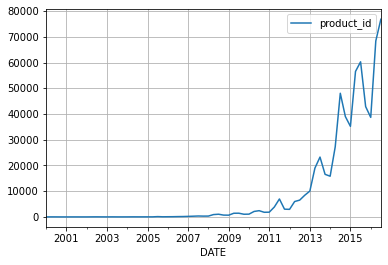

In [119]:
before.plot()

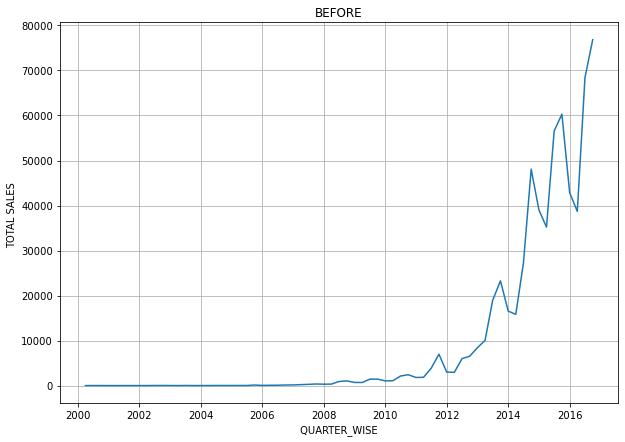

In [120]:
plt.figure(figsize=(10,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
plt.title("BEFORE")
ax1.plot(before);

In [121]:
after = pos['2016-09-30':'2018-12-31']

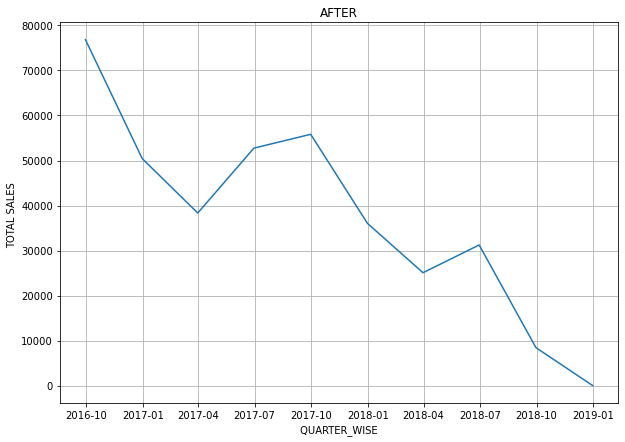

In [122]:
plt.figure(figsize=(10,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUARTER_WISE ")
ax1.set_ylabel("TOTAL SALES ")
plt.title("AFTER")
ax1.plot(after,);

<AxesSubplot:xlabel='DATE'>

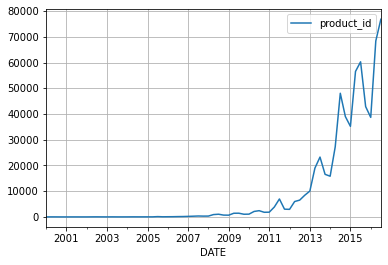

In [123]:
before.plot(kind="line",)

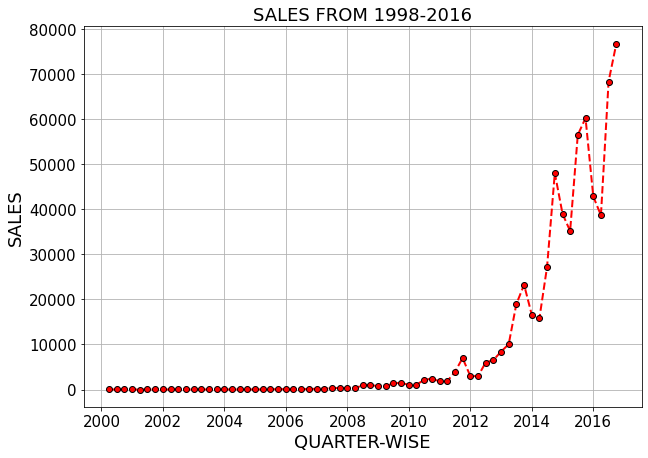

In [124]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("SALES FROM 1998-2016",fontsize = 18)
plt.xlabel("QUARTER-WISE",fontsize=18)
plt.ylabel("SALES",fontsize=18)
plt.plot(before,color = "red",linestyle = "--",marker  = "o",mec="black",linewidth = 2);

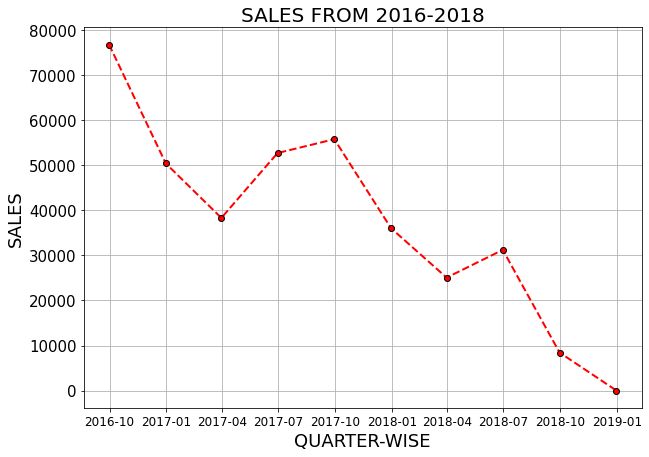

In [125]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.title("SALES FROM 2016-2018",fontsize = 20)
plt.xlabel("QUARTER-WISE",fontsize=18)
plt.ylabel("SALES",fontsize=18)
plt.plot(after,color = "red",linestyle = "--",marker  = "o",mec ="black",linewidth = 2);

# TIME SERIES FOR CHANGED DATA 

In [126]:
print(demand_tools_monthly.shape)
print(demand_tools_quaterly.shape)
print(demand_tools_yearly.shape)
print(demand_tools_weekly.shape)

(228,)
(77,)
(20,)
(987,)


In [127]:
demand_tools_weekly.head()

DATE
1999-11-14     2
1999-11-21     4
1999-11-28     0
1999-12-05    10
1999-12-12    10
Freq: W-SUN, Name: product_id, dtype: int64

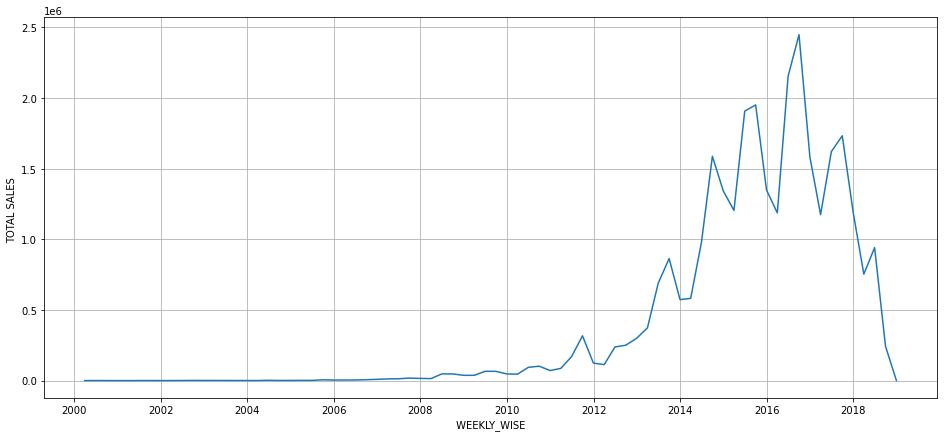

In [128]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" WEEKLY_WISE ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_patio_quaterly);

In [129]:
df_patio_quaterly_filtered = df_patio_quaterly['2012-11-08':'2018-12-31']

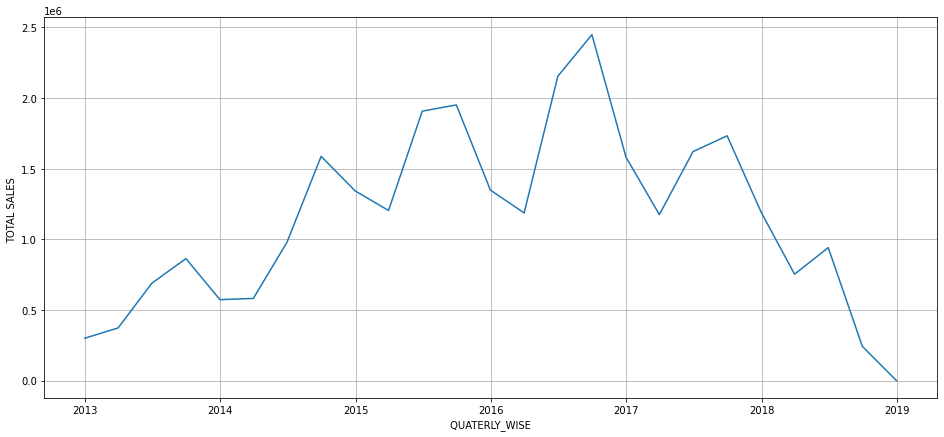

In [130]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel(" QUATERLY_WISE ")
ax1.set_ylabel("TOTAL SALES ")
ax1.plot(df_patio_quaterly_filtered);

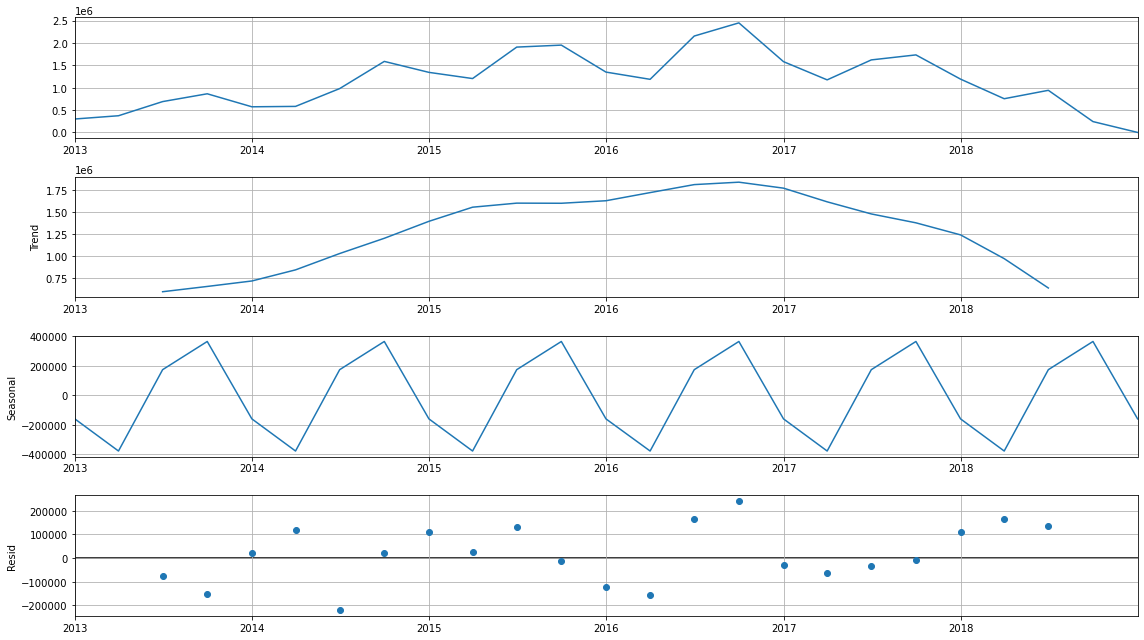

In [131]:
fig_qp=seasonal_decompose(df_patio_quaterly_filtered).plot();
fig_qp.set_size_inches((16,9))
fig_qp.tight_layout()
plt.show()

In [132]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df_patio_quaterly_filtered,Trace = True,
                         suppress_warnings=True)

In [133]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -356.944
Date:                Wed, 08 Feb 2023   AIC                            721.888
Time:                        15:53:56   BIC                            726.763
Sample:                    12-31-2012   HQIC                           723.240
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.649e+05   8.03e+05      0.579      0.563   -1.11e+06    2.04e+06
ar.L1          0.5350      0.660      0.811      0.417      -0.758       1.828
ma.L1          0.7602      0.344      2.212      0.027       0.087       1.434
sigma2      1.838e+11      2.630   6.99e+10      0.000    1.84e+11    1.84e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.91   Prob(JB):                         0.53
Heteroskedasticity (H):               2.17   Skew:                             0.13
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.63e+26. Standard errors may be unstable.
"""

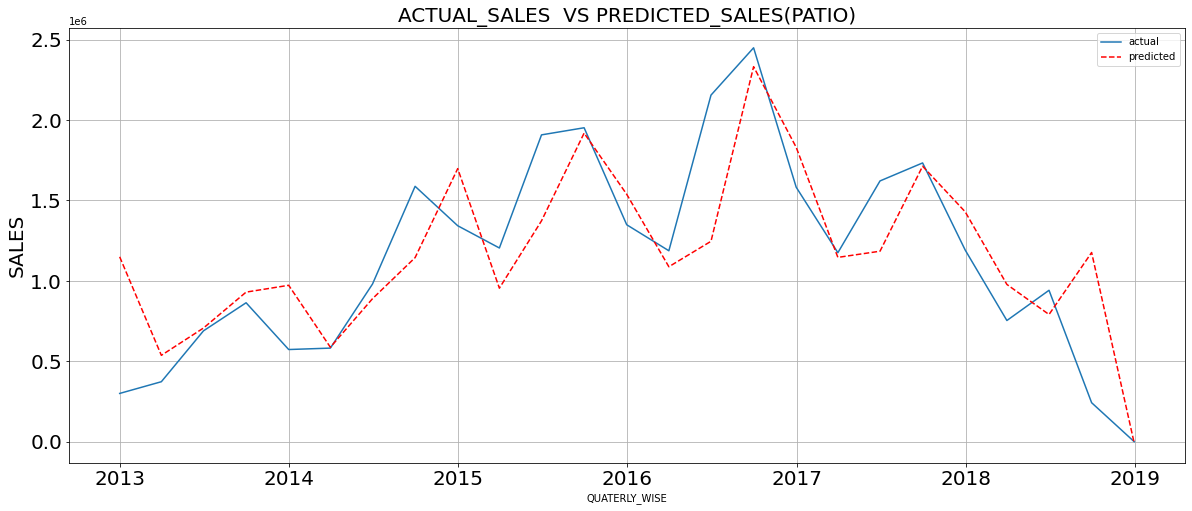

In [134]:
plt.figure(figsize=(20,8))
model = ARIMA(df_patio_quaterly_filtered,order=(1,0,1))
results_ARIMA = model.fit()
plt.plot(df_patio_quaterly_filtered)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed");
plt.xlabel("QUATERLY_WISE")
plt.ylabel("SALES",fontsize=20)
plt.legend(["actual",'predicted']);
plt.title("ACTUAL_SALES  VS PREDICTED_SALES(PATIO)",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [135]:
df_patio_quaterly_filtered.shape

(25, 1)

In [136]:
p=1;d=0;q=1

p_D_tool_filter = ARIMA(df_patio_quaterly_filtered,order=(p,d,q)).fit()

In [137]:
# forecast on the test data
start = 23
end = 28
predicting_future = p_D_tool_filter.predict(start,end)
predicting_future

2018-09-30    1.176423e+06
2018-12-31   -8.506070e+03
2019-03-31    6.380776e+05
2019-06-30    9.187360e+05
2019-09-30    1.045408e+06
2019-12-31    1.102580e+06
Freq: Q-DEC, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ACTUAL_SALES  VS PREDICTED_SALES(PATIO)')

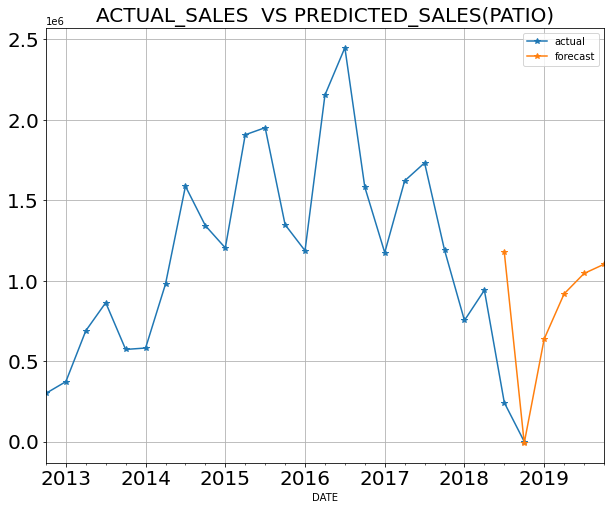

In [138]:
df_patio_quaterly_filtered.plot(figsize=(10,8),legend=True,marker = "*")
predicting_future.plot(legend=True,marker = "*");
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(["actual",'forecast']);

plt.title("ACTUAL_SALES  VS PREDICTED_SALES(PATIO)",fontsize=20)

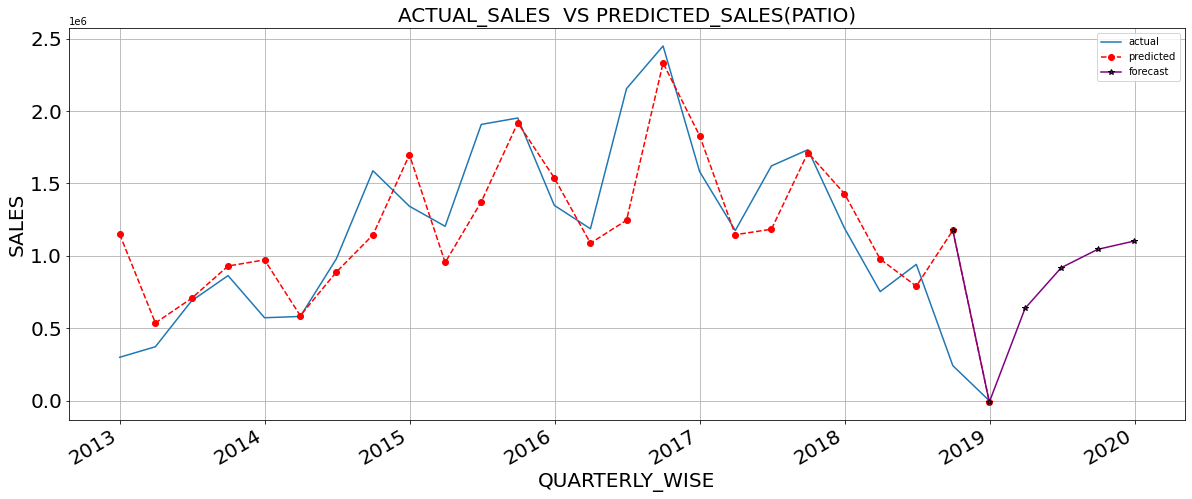

In [139]:
plt.figure(figsize=(20,8))
model = ARIMA(df_patio_quaterly_filtered,order=(1,0,1))
results_ARIMA = model.fit()
plt.plot(df_patio_quaterly_filtered)
plt.plot(results_ARIMA.fittedvalues,color = "red",linestyle = "dashed",marker = "o");
predicting_future.plot(legend=True,marker = "*",mec="black",color ="purple");
plt.xlabel("QUARTERLY_WISE",fontsize=20)
plt.ylabel("SALES",fontsize=20)
plt.legend(["actual",'predicted',"forecast"]);
plt.title("ACTUAL_SALES  VS PREDICTED_SALES(PATIO)",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [140]:
df3 = pd.DataFrame()

df3['ACTUAL_PRODUCTS'] = df_patio_quaterly_filtered['price']
df3['PREDICTED_PRODUCTS'] =  results_ARIMA.fittedvalues.values

df3['error'] = df3['ACTUAL_PRODUCTS'] - df3['PREDICTED_PRODUCTS']
df3['ABSOLUTE_ERROR'] = abs(df3['error'])

df3['APE']= np.round((df3['ABSOLUTE_ERROR']/df3['ACTUAL_PRODUCTS'])*100,2)

df3['square'] = df3['error']**2
print(df3)
print(np.sqrt(df3['square'].sum()/25))

            ACTUAL_PRODUCTS  PREDICTED_PRODUCTS          error  \
DATE                                                             
2012-12-31     3.004196e+05        1.149610e+06 -849190.341442   
2013-03-31     3.732369e+05        5.372406e+05 -164003.626509   
2013-06-30     6.895271e+05        7.070221e+05  -17495.049879   
2013-09-30     8.640231e+05        9.301906e+05  -66167.520222   
2013-12-31     5.733135e+05        9.726398e+05 -399326.316565   
2014-03-31     5.821488e+05        5.875298e+05   -5380.939615   
2014-06-30     9.803843e+05        8.893306e+05   91053.621900   
2014-09-30     1.587880e+06        1.144626e+06  443254.004912   
2014-12-31     1.342884e+06        1.697862e+06 -354978.102906   
2015-03-31     1.204507e+06        9.547352e+05  249771.695475   
2015-06-30     1.907729e+06        1.373533e+06  534195.468279   
2015-09-30     1.951879e+06        1.918583e+06   33295.778619   
2015-12-31     1.348966e+06        1.538342e+06 -189375.717720   
2016-03-31

In [141]:
print('Mean Absolute Percent Error:', round(np.mean(abs(df3['error']/77)),4))

Mean Absolute Percent Error: 3538.9602


In [142]:
print('Root Mean Squared Error:', np.sqrt(np.mean(df3['error']**2)))

Root Mean Squared Error: 386371.89384451235


In [143]:
 results_ARIMA.fittedvalues

DATE
2012-12-31    1.149610e+06
2013-03-31    5.372406e+05
2013-06-30    7.070221e+05
2013-09-30    9.301906e+05
2013-12-31    9.726398e+05
2014-03-31    5.875298e+05
2014-06-30    8.893306e+05
2014-09-30    1.144626e+06
2014-12-31    1.697862e+06
2015-03-31    9.547352e+05
2015-06-30    1.373533e+06
2015-09-30    1.918583e+06
2015-12-31    1.538342e+06
2016-03-31    1.087953e+06
2016-06-30    1.246195e+06
2016-09-30    2.331548e+06
2016-12-31    1.830314e+06
2017-03-31    1.146130e+06
2017-06-30    1.184461e+06
2017-09-30    1.712797e+06
2017-12-31    1.429408e+06
2018-03-31    9.779155e+05
2018-06-30    7.911120e+05
2018-09-30    1.176423e+06
2018-12-31   -8.506070e+03
Freq: Q-DEC, dtype: float64

In [144]:
df_patio_quaterly_filtered['price'].shape

(25,)

In [145]:
len(results_ARIMA.fittedvalues.values)

25